*   Nama : Ilham Oktavian
*   Dataset : train.csv
*   Sumber : Kaggle
*   Link Dataset : https://www.kaggle.com/lokkagle/movie-genre-data

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# Library
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential

In [79]:
# Membaca data dari file CSV
file_path = './drive/MyDrive/Dataset/sub 1/train.csv'
data = pd.read_csv(file_path, sep=',')

# Menampilkan beberapa baris terakhir dari data
tail_data = data.tail()
tail_data


,id,text,genre
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action
22578,28166,"rd walks off down the hallway, leaving his pos...",comedy


In [80]:
# Menghitung dan menampilkan jumlah nilai unik dalam kolom 'genre'
genre_counts = data['genre'].value_counts()
genre_counts

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [81]:
# Menghapus kolom 'id' dari DataFrame
data = data.drop(columns=['id'])
data.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama


In [82]:
# Memfilter data dengan menghilangkan beberapa nilai dalam kolom 'genre'
genres_to_exclude = ['sci-fi', 'horror', 'other', 'adventure', 'romance']
filtered_data = data[~data['genre'].isin(genres_to_exclude)]

# Menampilkan jumlah nilai unik dalam kolom 'genre' setelah penghapusan
filtered_genre_counts = filtered_data['genre'].value_counts()
filtered_genre_counts

drama       8873
thriller    6824
comedy      2941
action      2392
Name: genre, dtype: int64

In [83]:
# Membuat kolom-kolom dummy untuk nilai unik dalam kolom 'genre'
genre_dummies = pd.get_dummies(filtered_data['genre'])

# Menggabungkan DataFrame asli dengan kolom-kolom dummy
data_baru = pd.concat([filtered_data, genre_dummies], axis=1)

# Menghapus kolom 'genre' asli setelah membuat kolom-kolom dummy
data_baru = data_baru.drop(columns='genre')

# Menampilkan DataFrame yang telah dimodifikasi
data_baru

,text,action,comedy,drama,thriller
0,"eady dead, maybe even wishing he was. INT. 2ND...",0,0,0,1
1,"t, summa cum laude and all. And I'm about to l...",0,1,0,0
2,"up Come, I have a surprise.... She takes him ...",0,0,1,0
3,ded by the two detectives. INT. JEFF'S APARTME...,0,0,0,1
4,"nd dismounts, just as the other children reach...",0,0,1,0
...,...,...,...,...,...
22574,n in the world to decide what I'm going to do ...,0,0,1,0
22575,shards. BOJO LAZ! Laz pushes Deke back through...,0,0,1,0
22576,"OTTIE You've got a thing about Ernie's, haven'...",0,0,0,1
22577,....with marked skill and dexterity . LANA wry...,1,0,0,0


In [84]:
data_baru.columns

Index(['text', 'action', 'comedy', 'drama', 'thriller'], dtype='object')

In [85]:
# Mengambil kolom 'text' dan mengonversi ke tipe data string
tentang_film = data_baru['text'].astype(str)

# Mengambil kolom 'action', 'comedy', 'drama', dan 'thriller' sebagai nilai genre_film
genre_film = data_baru[['action', 'comedy', 'drama', 'thriller']].values


In [86]:
# Memisahkan data menjadi set latih dan set uji
tentang_latih, tentang_test, genre_latih, genre_test = train_test_split(
    tentang_film,  # Kolom 'text' atau 'about' (sesuai dengan data Anda)
    genre_film,
    test_size=0.2
)

In [87]:
# Inisialisasi Tokenizer dengan jumlah kata maksimum 5000 dan token untuk out-of-vocabulary
tokenizer = Tokenizer(num_words=5000, oov_token='*')

# Fitting Tokenizer pada data latih dan data uji
tokenizer.fit_on_texts(tentang_latih)
tokenizer.fit_on_texts(tentang_test)

# Mengonversi teks ke dalam urutan angka (sequences)
sekuens_latih = tokenizer.texts_to_sequences(tentang_latih)
sekuens_test = tokenizer.texts_to_sequences(tentang_test)

# Melakukan padding pada urutan angka agar memiliki panjang yang sama
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [88]:
# Model Sequential
model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Pengaturan optimizer Adam dengan learning rate 0.00146
optimizer = Adam(learning_rate=0.00146)

# Menggunakan optimizer yang telah diatur dalam model.compile
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_3 (LSTM)               (None, 64)                20736     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 109572 (428.02 KB)
Trainable params: 109572 (428.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
class ModelCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.9:
            print("Expected accuracy has been achieved. Stopping training.")
            self.model.stop_training = True

# Membuat objek callback
cb = ModelCallbacks()

In [91]:
model_history = model.fit(
    padded_latih,
    genre_latih,
    epochs=50,
    validation_data=(padded_test, genre_test),
    verbose=2,
    batch_size=128,
    callbacks=[cb]
)


Epoch 1/50
132/132 - 42s - loss: 1.2387 - accuracy: 0.4283 - val_loss: 1.0582 - val_accuracy: 0.4586 - 42s/epoch - 319ms/step
Epoch 2/50
132/132 - 41s - loss: 0.9392 - accuracy: 0.5473 - val_loss: 1.0390 - val_accuracy: 0.4586 - 41s/epoch - 313ms/step
Epoch 3/50
132/132 - 40s - loss: 0.6890 - accuracy: 0.6889 - val_loss: 0.6222 - val_accuracy: 0.7375 - 40s/epoch - 300ms/step
Epoch 4/50
132/132 - 40s - loss: 0.4661 - accuracy: 0.7984 - val_loss: 0.5796 - val_accuracy: 0.7796 - 40s/epoch - 303ms/step
Epoch 5/50
132/132 - 42s - loss: 0.3623 - accuracy: 0.8499 - val_loss: 0.5822 - val_accuracy: 0.8036 - 42s/epoch - 315ms/step
Epoch 6/50
132/132 - 40s - loss: 0.2966 - accuracy: 0.8879 - val_loss: 0.5756 - val_accuracy: 0.8143 - 40s/epoch - 301ms/step
Epoch 7/50
132/132 - 41s - loss: 0.2314 - accuracy: 0.9206 - val_loss: 0.5351 - val_accuracy: 0.8359 - 41s/epoch - 312ms/step
Epoch 8/50
132/132 - 41s - loss: 0.2274 - accuracy: 0.9249 - val_loss: 0.5999 - val_accuracy: 0.8393 - 41s/epoch - 311

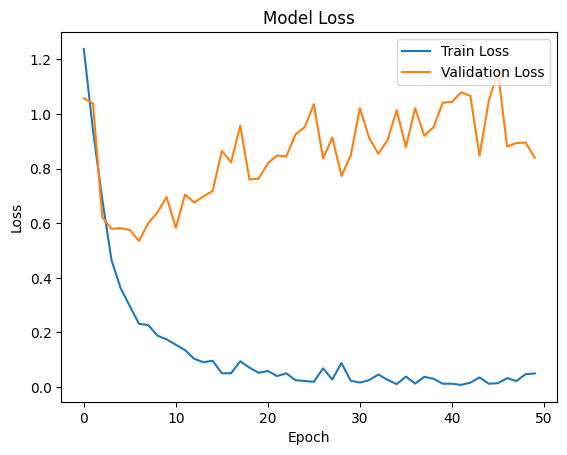

In [92]:
# Plot loss untuk pelatihan dan validasi
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')

# Menambahkan judul, label sumbu, dan legenda
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Menampilkan plot
plt.show()

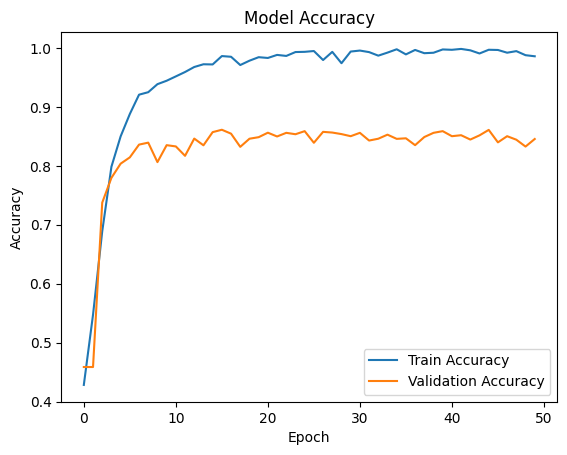

In [93]:
# Plot akurasi untuk pelatihan dan validasi
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')

# Menambahkan judul, label sumbu, dan legenda
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Menampilkan plot
plt.show()